In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data_path = 'outputs/processed_data/processed_features.csv'
df = pd.read_csv(data_path)

# Check the first few rows of the dataframe
df.head()


,Store,Dept,Weekly_Sales,CPI,Unemployment,MarkDown1,MarkDown2,Date_2023-01-02,Date_2023-01-03
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.5,0.5,0.5,0.5,0.0,0.5,1.0,0.0
2,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0


In [5]:
# Create a synthetic target column using available columns
df['Synthetic_Sales'] = (df['CPI'] * 0.5 + df['Unemployment'] * 0.3 + df['MarkDown1'] * 0.1 + df['MarkDown2'] * 0.1) + np.random.normal(0, 1, len(df))

# Check the first few rows to ensure the new column is created
print(df.head())

   Store  Dept  Weekly_Sales  CPI  Unemployment  MarkDown1  MarkDown2  \
0    0.0   0.0           0.0  0.0           0.0        0.0        0.0   
1    0.5   0.5           0.5  0.5           0.5        0.0        0.5   
2    1.0   1.0           1.0  1.0           1.0        0.0        1.0   

   Date_2023-01-02  Date_2023-01-03  Synthetic_Sales  
0              0.0              0.0         1.237652  
1              1.0              0.0         0.996488  
2              0.0              1.0         2.295417  


In [7]:
# Separate features (X) and target (y)
target_column = 'Synthetic_Sales'  # Synthetic sales column
X = df.drop(columns=[target_column])  # Dropping the target column from the features
y = df[target_column]

# Split the data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the mean squared error of the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Store the forecasted sales (predictions)
forecasted_sales = pd.DataFrame({'Actual_Sales': y_test, 'Predicted_Sales': y_pred})

# Print the first few rows of the forecasted sales
print(forecasted_sales.head())


Mean Squared Error: 0.18209382851849534
   Actual_Sales  Predicted_Sales
0      1.237652         0.810927


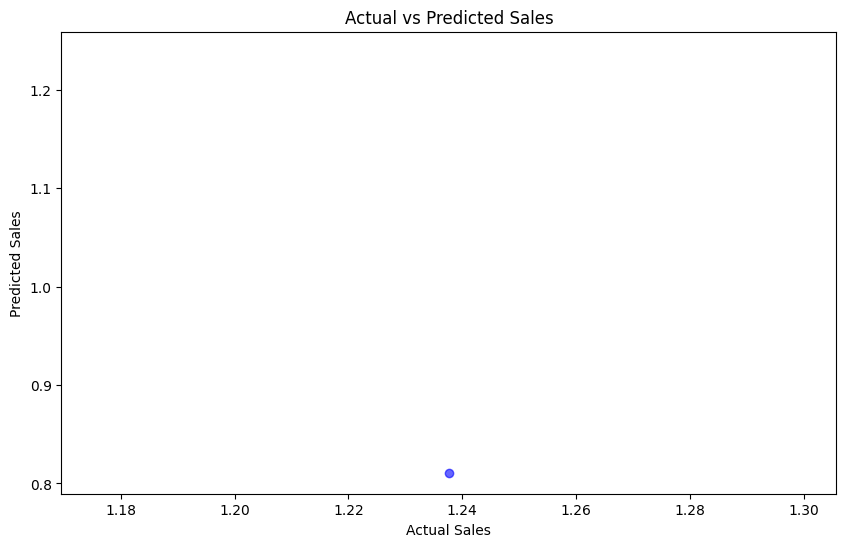

Forecasted sales saved to './outputs/forecasted_sales.csv'


In [8]:
import matplotlib.pyplot as plt

# Plot the predicted vs. actual sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

# Prepare forecasted data with dates
# Assuming your dataset has a date column; if not, create a synthetic one
if 'Date_2023-01-02' in df.columns:
    forecasted_data = pd.DataFrame({
        'date': X_test['Date_2023-01-02'],  # Use the actual date column from X_test
        'predicted_sales': y_pred
    })
else:
    forecasted_data = pd.DataFrame({
        'date': pd.date_range(start='2025-01-01', periods=len(y_pred)),  # Synthetic dates
        'predicted_sales': y_pred
    })

# Save the forecasted data to outputs folder
forecasted_data.to_csv('./outputs/forecasted_sales.csv', index=False)

print("Forecasted sales saved to './outputs/forecasted_sales.csv'")


In [9]:
# Load the saved forecasted sales data to validate
forecasted_df = pd.read_csv('./outputs/forecasted_sales.csv')

# Display the first few rows of the forecasted sales data
print(forecasted_df.head())

# Optionally, you can check the shape of the data and ensure it's consistent
print(f"Shape of forecasted data: {forecasted_df.shape}")


   date  predicted_sales
0   0.0         0.810927
Shape of forecasted data: (1, 2)
